In [4]:
import requests
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
mpl.rcParams['figure.figsize'] = (30, 8)
mpl.rcParams['axes.grid'] = True
from evaluation import forecast_accuracy

In [5]:
df = pd.read_pickle('../dataset/preprocessed/group_imputed.pkl')

In [6]:
# only select final occupancy
df = df[df['DBA']==89]
df = df.rename(columns={'ROH_med':'ROH'})
# # timeserise only on ROH
df = df.drop(columns=['DBA','ROH_min','ROH_max','ROH_avg','ROH_std','DOW','LAR_max','LAR_min','LAR_med','LAR_avg','LAR_std'])
df = df.set_index('DOA')
# # Filling missing values
df = df.asfreq(freq='d', method='ffill')
df.loc[df['ROH']==0,'ROH'] = df['ROH'].median()
## normalizing
scaler = MinMaxScaler()
df['ROH'] = scaler.fit_transform(df)

In [7]:
df.head()

HotelId,ROH
DOA,
2018-01-01,0.264706
2018-01-02,0.286765
2018-01-03,0.294118
2018-01-04,0.213235
2018-01-05,0.191176


In [8]:
index = int(len(df)*0.8)
train = df[:index]
test  = df[index:]

In [9]:
df.head()

HotelId,ROH
DOA,
2018-01-01,0.264706
2018-01-02,0.286765
2018-01-03,0.294118
2018-01-04,0.213235
2018-01-05,0.191176


In [12]:
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=7, damped=True)
model = model.fit()

In [13]:
y_pred = model.forecast(len(test))

In [15]:
forecast_accuracy(y_pred,test['ROH'])

0.153	&	-0.2922	&	0.1171	&	43.1592	&	0.1557	&	0.0242	&	0.2283


Text(0.5, 1.0, "Holt-Winter's Seasonal Smoothing")

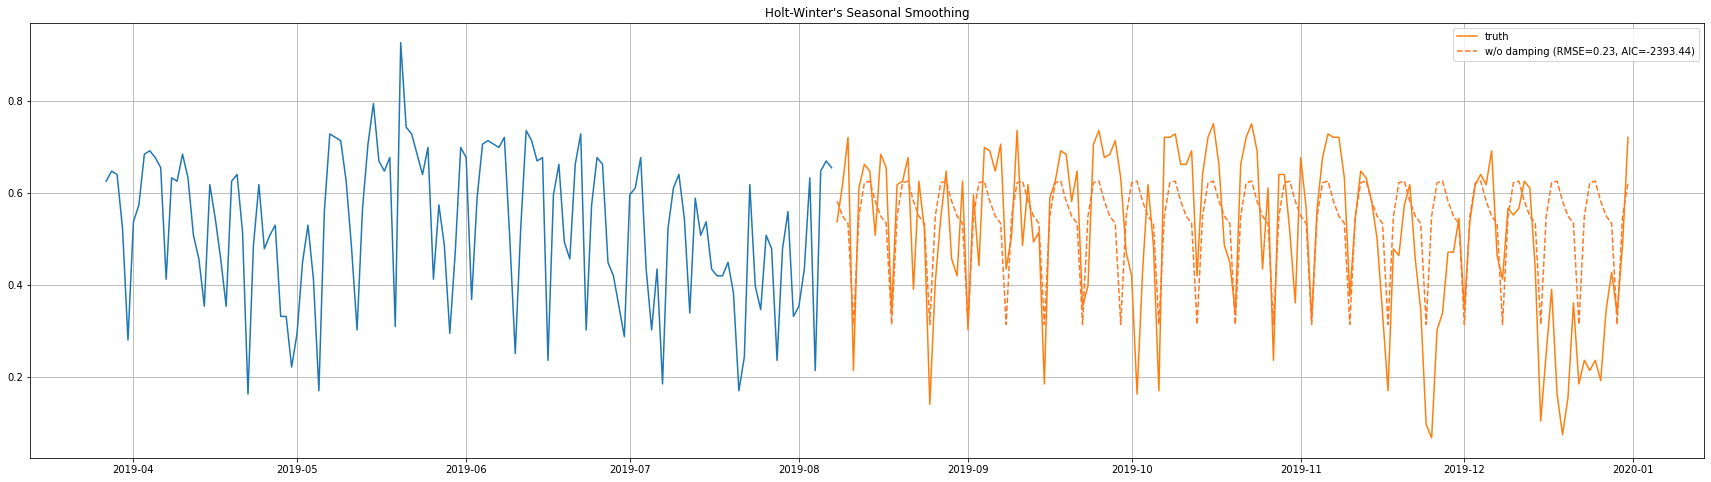

In [20]:
fig, ax = plt.subplots()
ax.plot(train.index[450:], train.values[450:])
ax.plot(test.index, test.values, label='truth')
ax.plot(test.index, y_pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(0.23123, fit.aic))
ax.legend()
ax.set_title("Holt-Winter's Seasonal Smoothing")